Generating synthetic workout data

Data Preview:
     duration  heart_rate     weight        age  gender  workout_type  \
0   51.199413  143.554020  48.905238  32.475161       0             1   
1  114.578574  113.293113  68.753416  59.511246       0             1   
2   90.519334  147.603957  47.429194  34.965204       0             2   
3   75.852433  152.211715  81.400839  33.567935       0             3   
4   27.162050  151.195809  71.236596  30.090312       1             1   

     calories  
0  295.298754  
1  619.944198  
2  532.993704  
3  594.093281  
4  135.196229  

Data Statistics:
          duration   heart_rate       weight          age       gender  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     63.928221   141.977916    70.207299    43.214736     0.485000   
std      32.135110    19.778661    14.556534    14.767840     0.500025   
min      10.509523    81.572990    24.707318    18.001597     0.000000   
25%      35.957059   128.717

C:\Users\Giovanni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 199389.8438 - mae: 411.1545 - val_loss: 203208.9375 - val_mae: 418.5466
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 203009.4531 - mae: 415.8438 - val_loss: 202368.0312 - val_mae: 417.4941
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 195166.4531 - mae: 403.7866 - val_loss: 200605.0938 - val_mae: 415.3275
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 201348.2344 - mae: 415.3175 - val_loss: 197002.2812 - val_mae: 410.9631
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 192236.2188 - mae: 403.5262 - val_loss: 189975.0312 - val_mae: 402.4656
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 186942.6094 - mae: 397.2398 - val_loss: 177179.3750 - val_mae: 386.8235
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 170023.4844 - mae: 373.9255 - val_loss: 156143.1250 - val_mae: 360.1382
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 147487.2031 - mae: 346.

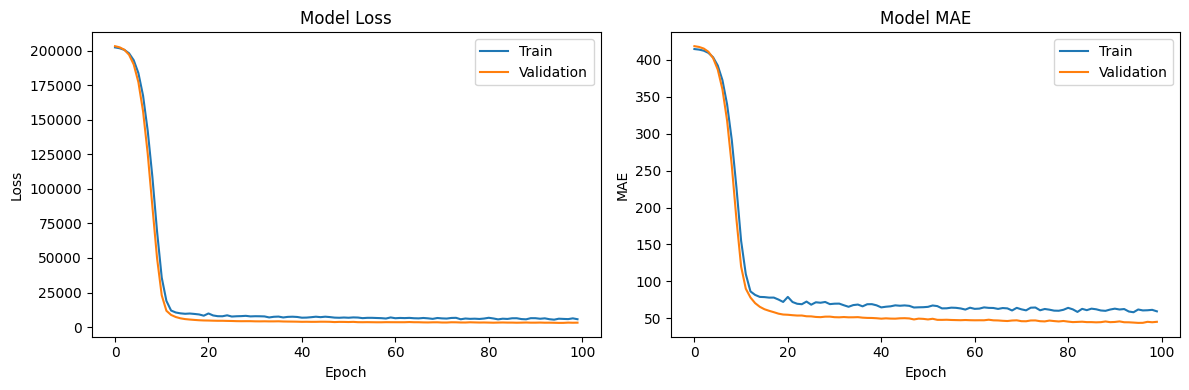

In [13]:
# e:\Giovanni\Documents\GitHub\GiovanniPisaniello_DepositoCorsoPython\calorie_prediction.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib

# Generate synthetic workout data (since we don't have real data)
print("Generating synthetic workout data")
np.random.seed(42)
n_samples = 1000

# Generate features
duration = np.random.uniform(10, 120, n_samples)  # workout duration in minutes
heart_rate = np.random.normal(140, 20, n_samples)  # average heart rate
weight = np.random.normal(70, 15, n_samples)  # weight in kg
age = np.random.uniform(18, 70, n_samples)  # age in years
gender = np.random.binomial(1, 0.5, n_samples)  # 0 for female, 1 for male
workout_type = np.random.randint(0, 5, n_samples)  # 0-4 different workout types

# Generate target: calories burned based on features
calories = (
    5 * duration +  # duration impact
    0.2 * heart_rate +  # heart rate impact
    0.1 * weight +  # weight impact
    -0.1 * age +  # age impact (younger people burn more)
    50 * gender +  # gender impact
    20 * workout_type  # workout type impact
)
calories += np.random.normal(0, 50, n_samples)  # add noise

# Create DataFrame
data = pd.DataFrame({
    'duration': duration,
    'heart_rate': heart_rate,
    'weight': weight,
    'age': age,
    'gender': gender,
    'workout_type': workout_type,
    'calories': calories
})

# Data exploration
print("\nData Preview:")
print(data.head())
print("\nData Statistics:")
print(data.describe())

# Preprocess data
X = data.drop('calories', axis=1)
y = data['calories']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later predictions
joblib.dump(scaler, 'scaler.save')

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer (no activation for regression)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate the model
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.savefig('training_history.png')

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Mean Absolute Error: {test_mae:.4f} calories")

# Example predictions
def predict_calories(duration, heart_rate, weight, age, gender, workout_type):
    input_data = np.array([[duration, heart_rate, weight, age, gender, workout_type]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled, verbose=0)[0][0]
    return prediction

# Save the model
model.save('calorie_prediction_model.keras')
print("\nModel saved as 'calorie_prediction_model.keras'")